In [215]:
from IPython.display import display
display({'text/html': '<h1>Topic2 Assignment - Part 2</h1>', 'text/plain': 'Topic2 Assignment - Part 2'}, raw=True)
display({'text/html': '<h1>Anoop Korappath</h1>', 'text/plain': 'Anoop Korappath'}, raw=True)
display({'text/html': '<h1>11/10/2021</h1>', 'text/plain': '11/10/2021'}, raw=True)

Topic2 Assignment - Part 2

Anoop Korappath

11/10/2021

In [216]:
import sns as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
import numpy as np

# load the MNIST digits dataset
whole_dataset = datasets.load_digits()

#Split your data into training and testing (80/20 is indeed a good starting point)
#Split the training data into training and validation (again, 80/20 is a fair split).
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(whole_dataset.data),
whole_dataset.target, test_size=0.20, random_state=42)
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
test_size=0.2, random_state=84)

# show the sizes of each data split
print("Training data points: {}".format(len(trainLabels)))
print("Validation data points: {}".format(len(valLabels)))
print("Testing data points: {}".format(len(testLabels)))

Training data points: 1149
Validation data points: 288
Testing data points: 360


In [217]:
# print accuracies for each value of k
k_values = range(1, 30, 2)
accuracies = []

# loop over various values of `k` for the k-Nearest Neighbor classifier
error = []
for k in range(1, 30, 2):
          # train the k-Nearest Neighbor classifier with the current value of `k`
          model = KNeighborsClassifier(n_neighbors=k)
          model.fit(trainData, trainLabels)
          # evaluate the model and update the accuracies list
          score = model.score(valData, valLabels)
          print("k=%d, accuracy=%.2f%%" % (k, score * 100))
          accuracies.append(score)
          predictions = model.predict(testData)
          print("k=%d, error=%.2f%%" % (k, np.mean(predictions != testLabels)))
          print("\n")


# find the value of k that has the largest accuracy

i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (k_values[i],
accuracies[i] * 100))


k=1, accuracy=98.96%
k=1, error=0.02%


k=3, accuracy=99.65%
k=3, error=0.01%


k=5, accuracy=99.31%
k=5, error=0.01%


k=7, accuracy=98.96%
k=7, error=0.02%


k=9, accuracy=98.96%
k=9, error=0.02%


k=11, accuracy=98.96%
k=11, error=0.02%


k=13, accuracy=98.26%
k=13, error=0.03%


k=15, accuracy=97.92%
k=15, error=0.02%


k=17, accuracy=96.88%
k=17, error=0.03%


k=19, accuracy=95.49%
k=19, error=0.03%


k=21, accuracy=95.14%
k=21, error=0.03%


k=23, accuracy=95.14%
k=23, error=0.03%


k=25, accuracy=95.49%
k=25, error=0.03%


k=27, accuracy=95.49%
k=27, error=0.03%


k=29, accuracy=94.79%
k=29, error=0.04%


k=3 achieved highest accuracy of 99.65% on validation data


In [218]:
from sklearn.metrics import confusion_matrix

# Re-train classifier using the best k value and predict the labels of the test data

model = KNeighborsClassifier(n_neighbors=k_values[i])
model.fit(trainData, trainLabels)
predictions = model.predict(testData)


print("EVALUATION ON TESTING DATA - Classification Report")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA - Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        33
           1       0.97      1.00      0.98        28
           2       1.00      1.00      1.00        33
           3       1.00      1.00      1.00        34
           4       0.98      1.00      0.99        46
           5       0.98      0.98      0.98        47
           6       1.00      1.00      1.00        35
           7       1.00      0.97      0.99        34
           8       1.00      0.97      0.98        30
           9       0.95      0.95      0.95        40

    accuracy                           0.99       360
   macro avg       0.99      0.99      0.99       360
weighted avg       0.99      0.99      0.99       360





Confusion matrix




Text(69.0, 0.5, 'Truth')

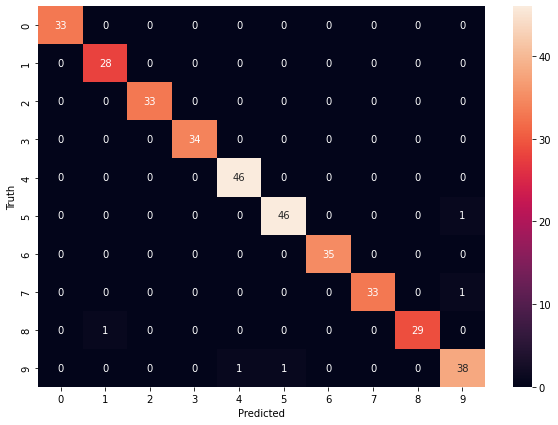

In [219]:
import seaborn as sn
import matplotlib.pyplot as plt

print("\n")
print ("Confusion matrix")
print("\n")
plt.figure(figsize = (10,7))
sn.heatmap(confusion_matrix(testLabels,predictions), annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')


#### All the diagonal elements are correct predictions, for example, we correctly predicted the number 0, 33 times.
#### The black cells, value shows the wrong predictions. For each number n in the cell, it means that we predicted the value in the truth row as the value is the predicted column, n times.

Text(0.5, 1.0, 'One')

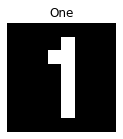

In [220]:
import matplotlib.pyplot as plt

# To test the model let us draw a 1
one = np.zeros((8, 8))
one[1:-1, 4] = 16  # The image values are in [0, 16].
one[2, 3] = 16
fig, ax = plt.subplots(1, 1, figsize=(2, 2))
ax.imshow(one, interpolation='none',
          cmap=plt.cm.gray)
ax.grid(False)
ax.set_axis_off()
ax.set_title("One")

In [221]:
# Now pass it as a 1D array to the model
print(model.predict(one.reshape((1, -1))))

#We can see that the prediction happened correctly


[1]


## Technical Report


#### Recognition of handwritten English Numerals is a complicated task due to its unconstrained shapes, individual writing style variations,noise presence that break the continuity in the numerical character and changes in the topology.
#### This paper proposes a new technique for feature extraction based on the maximum profile distance. The feature set includes number of holes in an image, Water Reservoir principle based features , Maximum profile distances and filling hole density. Total ten features are extracted: number of connected components is the first feature, four water reservoir features, four maximum profile density and one fill hole density feature. For calculating accuracy of the proposed method 50000 images are used for training set and 5000 images are used for test set.
#### The proposed method uses MNIST (Modified NIST) database which includes a training set of 60,000 images and a test set of 5000 images. The training and test sets are subset of NIST digit base. The MNIST digit database is good database for applying learning techniques and patterns recognition methods because of this database need less time for noise removal in preprocessing.
#### The recognition of handwritten numerals can achieve a high performance based on how preprocessing is done. In MNIST handwritten digit database images are in gray scale ,and those images are converted into a database of binary images.Converting the gray level images into binary is based on the threshold value. After converting the images into binary, these images may have surplus elements one’s (black) at undesirable places in the background image and that is called noise. It is necessary to remove noise from the image and for that an algorithm is used.
#### The proposed method uses k-nearest neighbor (knn) classification algorithm for classifying the MNIST digit images in test database using the feature vector of training database. The k-nearest neighbor algorithm (k-NN) is classification technique to classify the objects base on training features space. The functionality of k-NN algorithm is to define the computations until classification is done irrespective of the learning techniques. Generally k-NN has two learning techniques. They are instance-based and lazy learning techniques. K-nearest neighbor algorithm is simplest classification technique because of computations are simple. The classification of objects based on votes of its neighbors which represented by by k. In K-nn object is classified to a particular class which has majority of votes.
#### The algorithm is executed with the value of k is 1, 3, and 5. The graphical representation of the accuracy of classification in using various k values are shown in figure and the overall classification results are listed out in table
#### Feature extraction is an important phase of any recognition system and in particular numerical recognition. In this paper, structural features are used for the recognition of numerals. The number of loops in the image (1 feature), water Reservoir principle based features (4 features), maximum profile distances (4 features) and fill hole density feature (1 feature) are used for the numeral recognition. Totally 10 features are extracted from each image.
#### From table and figure it is clearly evident that the optimal value of k is 1 for classification of MNIST numerical digits by using k-nearest neighbor classification technique. The recognition rate of the individual digits in test samples by using k-nearest neighbor classification algorithm (with k value 1) are listed in table  and from that table the overall recognition rate of the test database is 96.94%.
#### An i.mage is a 2D (N,M) matrix, which has NM features. This matrix needs to be flattened when composing the data matrix; each row is a full image. The idea of K-nearest neighbors is as follows: given a new point in the feature space, find the K closest points from the training set and assign the label of the majority of those points. The distance is generally the Euclidean distance, but other distances can be used too.
#### The ROC plots suggests that we will be able to identify all true zeros when misclassifying a small percentage of other numbers. This seems to make sense given the confusion matrix, which shows a very high accuracy for zeros. The ROC plots also reflect the lower accuracy for threes or nines.AN ROC curve essentially shows the trade-off between false negatives anD false positives for a given task (e.g. recognizing nines).

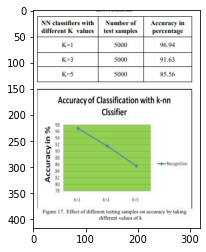

In [222]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread("C:\\Users\\Anoops\\Downloads\\1.jpg")
plt.imshow(image)
plt.show()


### References
#### Larose, C. D., &amp; Larose, D. T. (2019). Data science using Python and R. Wiley.
#### Nagalapuram, G. D. (2021, May 19). Recognizing handwritten digits with Scikit-learn. Medium. Retrieved November 10, 2021, from https://medium.com/analytics-vidhya/recognizing-handwritten-digits-with-scikit-learn-157fd6073857.
#### A.F.R. Rahman, R.Rahman, M.C.Fairhurst, “Recognition of handwritten Bengali Characters: A Novel Multistage Approach”,Pattern Recognition, 35,997-1006, 2002
#### U. R. Babu, Y. Venkateswarlu and A. K. Chintha, "Handwritten Digit Recognition Using K-Nearest Neighbour Classifier," 2014 World Congress on Computing and Communication Technologies, 2014, pp. 60-65, doi: 10.1109/WCCCT.2014.7.
